In [1]:
import numpy as np
from sim_library.simulation import simulate_pulses_p_dist
from sim_library.sequences import gen_resonant_pm_seq, gen_offresonant_pm_seq
from sim_library.constants import k_eff, dR
from scipy.constants import hbar, pi
import matplotlib.pyplot as plt

down
up
down
up
-6.999999999999999
5.0
-3.0
1.0


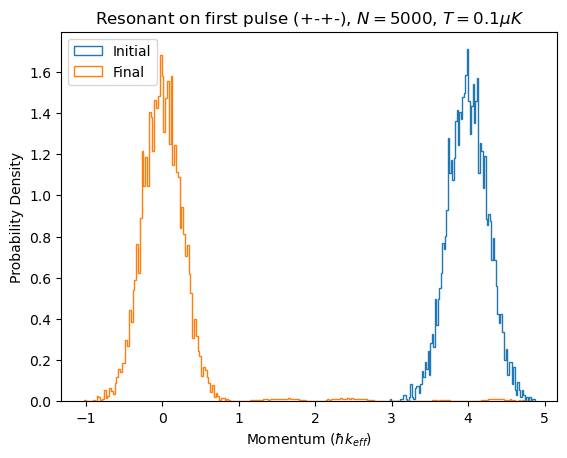

In [9]:
N = 5000
Temp = 0.1e-6

p_min = 0
p_max = 4
basis = np.arange(p_min, p_max + 1)

initial_state = np.zeros(shape=len(basis), dtype=np.complex128)
initial_state[-1] = 1

pulse_seq2 = gen_resonant_pm_seq(no_pulses=4, rabi_freq=2*pi*100000, p_start=4, dir='neg')

for pulse in pulse_seq2.pulses:
    print(pulse.type)
for pulse in pulse_seq2.pulses:
    print(pulse.laser_det/(dR))

final, fracs, init, _ = simulate_pulses_p_dist(pulse_seq=pulse_seq2, Temp=Temp, no_atoms=N, basis=basis, initial_state=initial_state)

final = final/(hbar*k_eff)
# This is just adding the initial momentum by looking at position the largest value (1) in the initial state
# This does not work if you start in a superposition
# I could defo think of a way to convert a superposition state into a momentum distribution but that would be pointless atm
init = init/(hbar*k_eff) + basis[np.argmax(initial_state)]  

plt.hist(x = init, bins = 100, histtype='step',density=True,label='Initial')
plt.hist(x = final, bins = 250, weights=fracs, histtype='step',density=True, label='Final')
plt.title(rf"Resonant on first pulse (+-+-), $N={N}$, $T={Temp*1e6:.3g}\mu K$")
plt.ylabel('Probability Density')
plt.xlabel(r"Momentum ($\hbar k_{eff}$)")
plt.legend()
plt.show()